In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Creating initial machine learning model as baseline
# Importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
# Connect to the database
con = sqlite3.connect('resources/heart.sqlite') 

# Run SQL on table         
sql_query = pd.read_sql('SELECT * FROM replaced', con)

# Display query results
sql_query.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
# Convert SQL to Pandas DataFrame
df_replaced = pd.DataFrame(sql_query, columns = ['Age',
                                        'Sex',
                                        'ChestPainType',
                                        'RestingBP',
                                        'Cholesterol',
                                        'FastingBS',
                                        'RestingECG',
                                        'MaxHR',
                                        'ExerciseAngina',
                                        'Oldpeak',
                                        'ST_Slope',
                                        'HeartDisease']
                 )

# Preview newly created DF
df_replaced.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
# Split our preprocessed data into our features and target arrays
y = df_replaced['HeartDisease']
X = df_replaced.drop(columns='HeartDisease')

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
X= pd.get_dummies(X)
# Drop the non-beneficial ID columns, 'HeartDisease'.

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [17]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
X_train.shape

(734, 20)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1
########look at this further######

nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
model = nn_model_4.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.2758 - loss: 0.7057 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5003 - loss: 0.6974
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5608 - loss: 0.6910
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5622 - loss: 0.6849
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.5552 - loss: 0.6806
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.5253 - loss: 0.6770
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.5721 - loss: 0.6599
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 0.6478 
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.7348 - loss: 0.6369
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8419 - loss: 0.6144
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8482 - loss: 0.5988
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 10ms/step - accuracy: 0.9076 - loss: 0.4131
Loss: 0.41314348578453064, Accuracy: 0.907608687877655


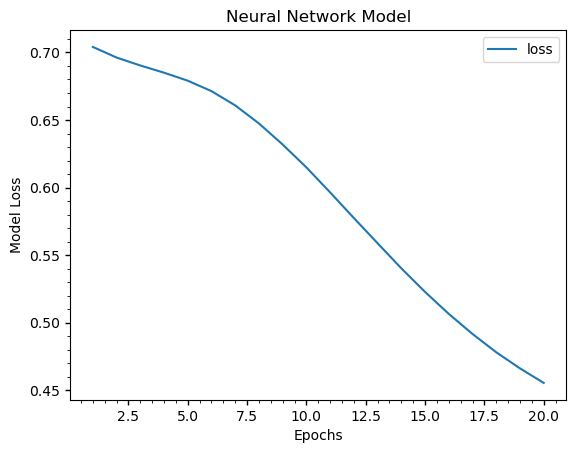

In [77]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.title("Neural Network Model")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)

# Display the plot and save image
plt.savefig("resources/images/neural_net_loss.png", format="png")
plt.show()

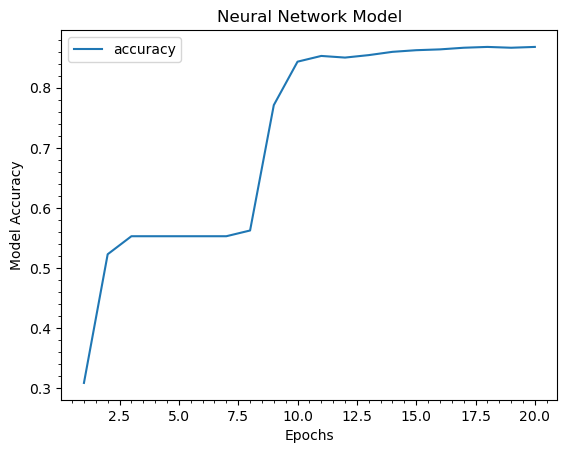

In [76]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.title("Neural Network Model")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()

# Display the plot and save image
plt.savefig("resources/images/neural_net_accuracy.png", format="png")
plt.show()

In [35]:
y_test

402    1
330    1
584    1
446    1
647    0
      ..
344    1
687    0
96     0
379    1
329    1
Name: HeartDisease, Length: 184, dtype: int64

In [36]:
y_test.shape

(184,)

In [37]:
# Calculate the classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
predictions = nn_model_4.predict(X_test_scaled, verbose = 0)
predictions = predictions.ravel()

In [38]:
# Define the array and the threshold
threshold = .7

# Transform numbers to 1 or 0 based on the threshold
transformed_predictions = [1 if x > threshold else 0 for x in predictions]

# Display new array
print(transformed_predictions)

[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]


In [39]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, transformed_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, transformed_predictions)

In [43]:
print("Confusion Matrix: Deep Neural Network")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("")
print("Classification Report: Deep Neural Network")
print(classification_report(y_test, transformed_predictions))

Confusion Matrix: Deep Neural Network


,Predicted 0,Predicted 1
Actual 0,76,6
Actual 1,13,89


Accuracy Score : 0.8967391304347826

Classification Report: Deep Neural Network
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        82
           1       0.94      0.87      0.90       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train_scaled, y_train)

In [47]:
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [48]:
# Displaying results
print("Confusion Matrix: Random Forest")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("")
print("Classification Report: Random Forest")
print(classification_report(y_test, predictions))

Confusion Matrix: Random Forest


,Predicted 0,Predicted 1
Actual 0,70,12
Actual 1,10,92


Accuracy Score : 0.8804347826086957

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [49]:
# Get the feature importance array
importances = rf_model.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.10915924233846225, 'ST_Slope_Flat'),
 (0.10288485797567366, 'ST_Slope_Up'),
 (0.09852869328070513, 'MaxHR'),
 (0.0922171747199552, 'ChestPainType_ASY'),
 (0.08928417958390054, 'Oldpeak'),
 (0.08163119019186933, 'Cholesterol'),
 (0.07824588270140449, 'RestingBP'),
 (0.07431300490808955, 'Age'),
 (0.05280098847080476, 'ExerciseAngina_N'),
 (0.04238625586044432, 'ExerciseAngina_Y')]

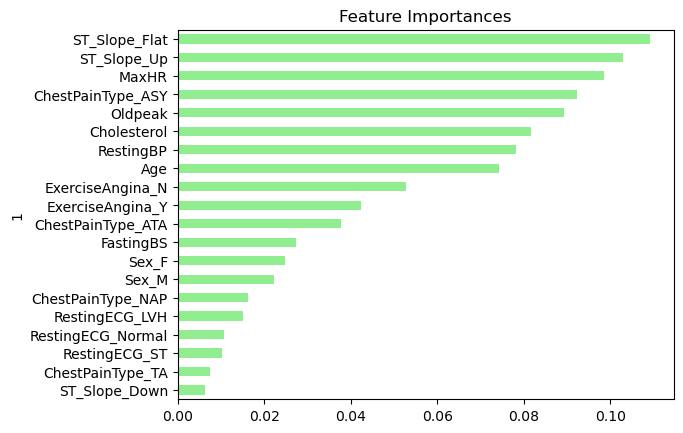

In [75]:
#Create DataFrame and plot feature importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

# Display plot and save image
plt.savefig("resources/images/feature_importances.png", format="png")
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(solver="lbfgs").fit(X_train_scaled, y_train)
predictions = log_classifier.predict(X_test_scaled)                                                                  

In [61]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [64]:
# Displaying results
print("Confusion Matrix: Logistic Regression")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("")
print("Classification Report: Logistic Regression")
print(classification_report(y_test, predictions))

Confusion Matrix: Logistic Regression


,Predicted 0,Predicted 1
Actual 0,72,10
Actual 1,13,89


Accuracy Score : 0.875

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.90      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

